<a href="https://colab.research.google.com/github/fereshteh-bahadory/NewProject/blob/main/semantix_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import cv2
import os
import pathlib
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
Image_height=256
Image_width=256
Image_channel=3

seed =20
seed = np.random.seed

In [5]:
Inputs = layers.Input((Image_height,Image_width,Image_channel))
s = tf.keras.layers.Lambda(lambda x: x / 255)(Inputs)
#encoder
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#decoder
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[Inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [6]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
from keras.utils.np_utils import to_categorical 

In [7]:
directory = pathlib.Path('/content')
X = np.full((25,256,256,3),0)
im_name=[]
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_images':
    images = os.listdir(path)
    for i, image_name in enumerate(images):
      #print(type(image_name))
      if image_name.endswith(".png"):
        im_name.append(image_name)
        im_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_images':
    for i, image_name in enumerate(images):
      if image_name.endswith('.png'):
        str_name = str(image_name)
        k = im_name.index(str_name)
        #print(image_name)
        image = cv2.imread(path+"/"+image_name,3)
        #iamge = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
        #image = Image.fromarray(image)
        image=np.array(image)
        X[k]=image

In [8]:
directory = pathlib.Path('/content')
y_lb=np.full((25,256,256),0)
lb_name=[]
v=0
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_labels':
    labels = os.listdir(path)
    for i, image_name in enumerate(labels):
      if image_name.endswith(".png"):
        #print(image_name)
        lb_name.append(image_name)
        lb_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_labels':
    labels = os.listdir(path)
    for i, image_name in enumerate(labels):
      v=v+1
      if image_name.endswith(".png"):
        str_lb=str(image_name)
        l = lb_name.index(image_name)       
        label = cv2.imread(path+"/"+image_name,cv2.IMREAD_GRAYSCALE)
        #label = cv2.cvtColor(label,cv2.COLOR_BGR2RGB)
        #label = scaler.fit_transform(label.reshape(-1, label.shape[-1])).reshape(label.shape)
        #label = Image.fromarray(label)
        label=np.array(label)
        #label = to_categorical(label)
        y_lb[l]=label

In [9]:
y_1 = np.full((25,256,256),0)
y = np.full((25,256,256,1),0)
matrix = np.full((25,256,256),0)
pmat = np.full((25,65536),0)
for i in range(0,25):
  mat = np.zeros(y_lb[i].size)
  mat2 = np.zeros(y_lb[i].size)
  flat_lb = y_lb[i].flatten()
  for j in range(0,y_lb[i].size):
    if flat_lb[j]>0.8:
      mat[j] = 1
    else:
      mat[j]=0
  mat2_2=mat2*255
  mat2_reshape = mat2_2.reshape(256,256)
  mat2_fin= np.expand_dims(mat2_reshape, axis = 2)
  pmat[i]=mat
  mat_reshape=mat.reshape(256,256)
  y[i]=mat2_fin
  matrix[i]=mat_reshape
for i in range(0,25):
  y[i]=np.expand_dims(matrix[i], axis = 2)

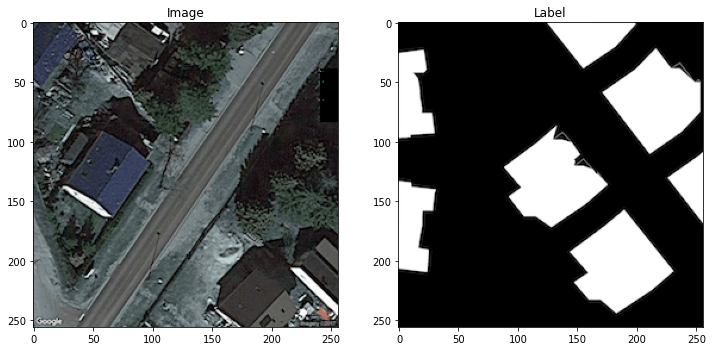

In [10]:
import random
t = random.randint(0,24)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(X[t])
plt.title('Image')
plt.subplot(122)
plt.imshow(y_lb[t], cmap='gray')
plt.title('Label')
plt.show()

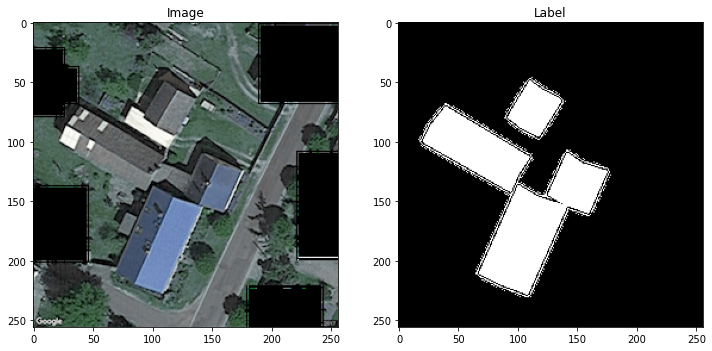

In [ ]:
import random
t = random.randint(0,24)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(X[24])
plt.title('Image')
plt.subplot(122)
plt.imshow(matrix[24], cmap='gray')
plt.title('Label')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.08, random_state=1)
print(X_train.shape,'\n',y_train.shape, '\n',X_test.shape, '\n', y_test.shape)

In [ ]:
#Checkpoint
chpointer = keras.callbacks.ModelCheckpoint('sat_model.h5', verbose=1, save_best_only=True)

#Earlystopp and 
callbacks = [
    keras.callbacks.ModelCheckpoint('sat_model.h5', verbose=1, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    keras.callbacks.TensorBoard(log_dir='logs')]

In [11]:
results = model.fit(X, y, validation_split=0.04, batch_size=1, epochs=100)#, callbacks=callbacks)
mymodel=results.model    

Epoch 1/100
24/24 [==============================] - 12s 457ms/step - loss: 0.5489 - accuracy: 0.7799 - val_loss: 0.5223 - val_accuracy: 0.8412
Epoch 2/100
24/24 [==============================] - 11s 476ms/step - loss: 0.4638 - accuracy: 0.8335 - val_loss: 0.4297 - val_accuracy: 0.8412
Epoch 3/100
24/24 [==============================] - 11s 471ms/step - loss: 0.4042 - accuracy: 0.8335 - val_loss: 0.3276 - val_accuracy: 0.8412
Epoch 4/100
24/24 [==============================] - 11s 451ms/step - loss: 0.3913 - accuracy: 0.8335 - val_loss: 0.3424 - val_accuracy: 0.8412
Epoch 5/100
24/24 [==============================] - 11s 439ms/step - loss: 0.4444 - accuracy: 0.8335 - val_loss: 0.3201 - val_accuracy: 0.8412
Epoch 6/100
24/24 [==============================] - 11s 439ms/step - loss: 0.3871 - accuracy: 0.8335 - val_loss: 0.3137 - val_accuracy: 0.8412
Epoch 7/100
24/24 [==============================] - 11s 464ms/step - loss: 0.3674 - accuracy: 0.8380 - val_loss: 0.2857 - val_accuracy:

In [12]:

idx = random.randint(0, len(X))


preds_train = model.predict(X[:int(X.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X[int(X.shape[0]*0.9):], verbose=1)


 
preds_train_t = (preds_train > 0.4).astype(np.uint8)
preds_val_t = (preds_val > 0.4).astype(np.uint8)

1/1 [==============================] - 3s 3s/step


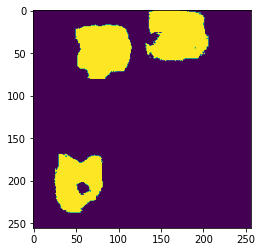

In [13]:
preds_train_t[1].shape
l = np.squeeze(preds_train_t[1])
plt.imshow(l)

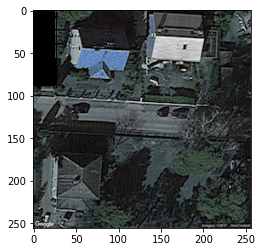

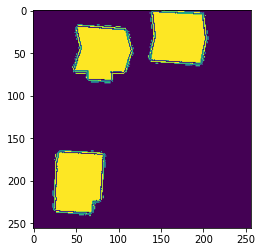

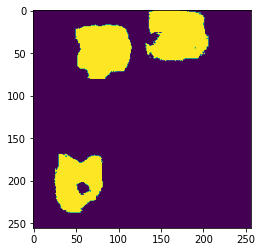

In [14]:
ix = random.randint(0, len(preds_train_t))
plt.imshow(X[ix])
plt.show()
plt.imshow(np.squeeze(y[ix]))
plt.show()
plt.imshow(np.squeeze(preds_train_t[ix]))
plt.show()

In [15]:
directory = pathlib.Path('/content')
X_test = np.full((5,256,256,3),0)
im_name=[]
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'test_images':
    images = os.listdir(path)
    for i, image_name in enumerate(images):
      #print(type(image_name))
      if image_name.endswith(".png"):
        im_name.append(image_name)
        im_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'test_images':
    for i, image_name in enumerate(images):
      if image_name.endswith('.png'):
        str_name = str(image_name)
        k = im_name.index(str_name)
        #print(image_name)
        image = cv2.imread(path+"/"+image_name,3)
        iamge = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
        image = Image.fromarray(image)
        image=np.array(image)
        X_test[k]=image

In [16]:
preds_test = model.predict(X_test, verbose=1)
preds_test_t = (preds_test > 0.4).astype(np.uint8)

1/1 [==============================] - 1s 516ms/step


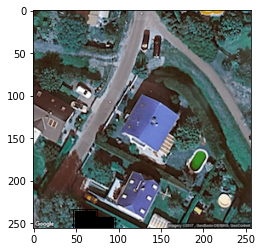

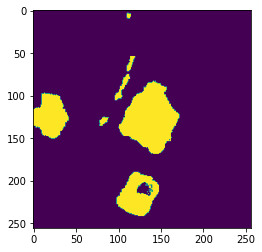

In [18]:
ix = random.randint(0,5)
plt.imshow(X_test[ix])
plt.show()
plt.imshow(np.squeeze(preds_test_t[ix]))
plt.show()